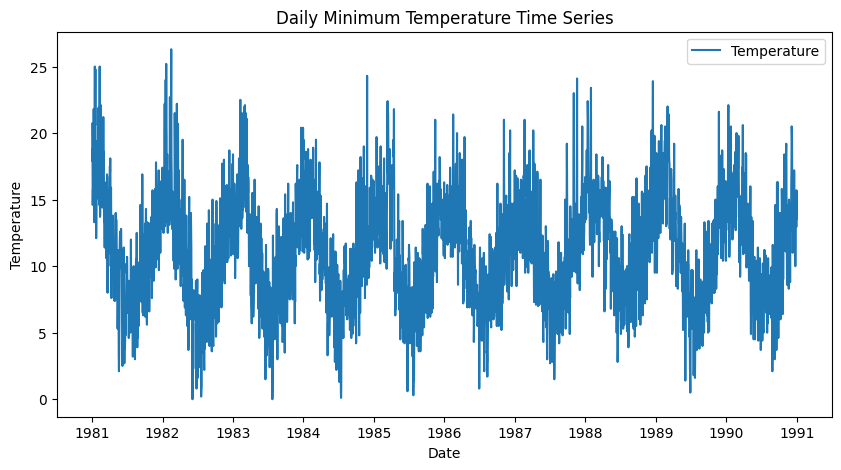

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training Dense Model...
Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0420 - mae: 0.1459 - val_loss: 0.0085 - val_mae: 0.0732
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0101 - mae: 0.0777 - val_loss: 0.0074 - val_mae: 0.0676
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0096 - mae: 0.0766 - val_loss: 0.0089 - val_mae: 0.0751
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0097 - mae: 0.0771 - val_loss: 0.0072 - val_mae: 0.0671
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0091 - mae: 0.0748 - val_loss: 0.0076 - val_mae: 0.0691
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0094 - mae: 0.0759 - val_loss: 0.0072 - val_mae: 0.0669
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0093 - mae: 0.0752 - val_loss: 0.0074 - val_mae: 0.0682
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0087 - mae: 0.0733 - val_loss: 0.0072 - val_mae: 0.0669
Epoch 9/10
182/182 ━━━━━━━━━━━━

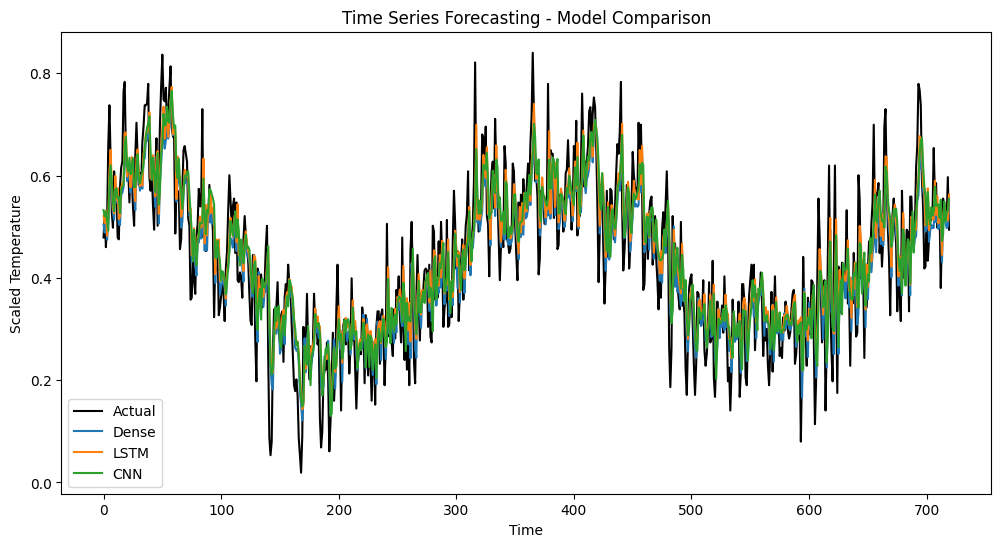

In [1]:
# 📌 Project Name: TimeSeriesForecast

# ✅ Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load Sample Time Series Data (Google Stocks)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url, parse_dates=["Date"], index_col="Date")

# ✅ Visualize the Data
plt.figure(figsize=(10, 5))
plt.plot(df, label="Temperature")
plt.title("Daily Minimum Temperature Time Series")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# ✅ Train-Test Split (80% Train, 20% Test)
split_ratio = 0.8
train_size = int(len(df) * split_ratio)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# ✅ Normalize the Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data)
test_scaled = scaler.transform(test_data)

# ✅ Convert Data into Sequences
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

# ✅ Prepare Training & Testing Sets
time_steps = 10
X_train, y_train = create_sequences(train_scaled, time_steps)
X_test, y_test = create_sequences(test_scaled, time_steps)

# ✅ Define Models
def create_dense_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(time_steps, 1)),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

def create_lstm_model():
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(time_steps, 1)),
        tf.keras.layers.LSTM(32),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

def create_cnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(64, kernel_size=3, activation="relu", input_shape=(time_steps, 1)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(32, kernel_size=3, activation="relu"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

# ✅ Train Models
models = {
    "Dense": create_dense_model(),
    "LSTM": create_lstm_model(),
    "CNN": create_cnn_model()
}

for name, model in models.items():
    print(f"\nTraining {name} Model...")
    model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# ✅ Evaluate Models
for name, model in models.items():
    loss, mae = model.evaluate(X_test, y_test, verbose=0)
    print(f"{name} Model - MAE: {mae:.4f}")

# ✅ Make Predictions
predictions = {}
for name, model in models.items():
    predictions[name] = model.predict(X_test)

# ✅ Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="black")
for name, pred in predictions.items():
    plt.plot(pred, label=name)
plt.legend()
plt.title("Time Series Forecasting - Model Comparison")
plt.xlabel("Time")
plt.ylabel("Scaled Temperature")
plt.show()
